![Tensorflow](https://www.tensorflow.org/images/apple-touch-icon-180x180.png "Tensorflow")

## _Logistic Regression using Tensorflow and Tensorboard_
> #### Using MNIST Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from __future__ import print_function
%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
epoch = 4001
learning_rate = 0.5
weights_original = []

In [4]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 784], name='features')
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='labels')

W = tf.Variable(tf.zeros([784, 10]), name='weights')
b = tf.Variable(tf.zeros([10]), name='bias')

with tf.name_scope('predicted_label'):
    # sigmoid(X * W + b)
    y_pred = tf.add(tf.matmul(X, W), b)

with tf.name_scope('cross_entropy'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=Y))
    tf.summary.scalar('loss', loss)

In [5]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Accuracy checking model
with tf.name_scope('accuracy_check'):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1, name='maxOfPredicted'), 
                                        tf.argmax(Y, 1), name='maxOfBinLabel')
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()


In [6]:
merge = tf.summary.merge_all()
writer = tf.summary.FileWriter('./tmp')

In [7]:
weights_updated = []
with tf.Session() as sess:
    writer.add_graph(sess.graph)
    sess.run(init)
    weights_original = np.array(W.eval())
    for step in range(epoch):
        batch_x, batch_y = mnist.train.next_batch(100)
        _, summ = sess.run([optimizer, merge], feed_dict={
            X: batch_x, Y: batch_y
        })
        writer.add_summary(summ, step)
    fd_test = {X: mnist.test.images, Y: mnist.test.labels}
    fd_cv = {X: mnist.validation.images, Y: mnist.validation.labels}
    
    print('test accuracy = ', np.round(sess.run(accuracy, fd_test)*100), '%')
    print('cross validation accuracy = ', np.round(sess.run(accuracy, fd_cv)*100), '%')
    weights_updated = np.array(W.eval())

test accuracy =  92.0 %
cross validation accuracy =  93.0 %


Random weights.


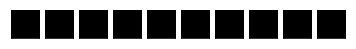

Optimised weights.


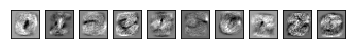

In [8]:
print("Random weights.")
fig, axarr = plt.subplots(1, 10)
for i in range(10):
    axarr[i].imshow(np.array(weights_original[:, i]).reshape(28, 28), cmap="gray")
    axarr[i].axes.get_xaxis().set_visible(False)
    axarr[i].axes.get_yaxis().set_visible(False)
plt.show()

print("Optimised weights.")
fig2, axarr2 = plt.subplots(1, 10)
for i in range(10):
    axarr2[i].imshow(np.array(weights_updated[:, i]).reshape(28, 28), cmap="gray")
    axarr2[i].axes.get_xaxis().set_visible(False)
    axarr2[i].axes.get_yaxis().set_visible(False)
plt.show()
